In [1]:
import copy, random, matplotlib
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams["font.size"] = 16

In [4]:
# what variables are important for us to capture?
# how can we use the data to find good values?

# this is a VERY simple simulation to use as a
# starting point
PROMOTION_PROB_PER_EMP = 0.4
PROMOTION_AMOUNT = 1.20
RETIRE_PROB_PER_EMP = 0.1
HIRE_PROB = 0.7
START_SALARY = 50000

In [5]:
# generate unique fake employee IDs

next_id = 1000
def gen_emp_id():
    global next_id
    next_id += 1
    return str(next_id)

In [6]:
# let's imagine these are the employees we currently have 
agency = {
    gen_emp_id(): {"salary": 50000, "position": "engineer"},
    gen_emp_id(): {"salary": 55000, "position": "engineer"},
    gen_emp_id(): {"salary": 58000, "position": "engineer"},
}

agency

{'1001': {'salary': 50000, 'position': 'engineer'},
 '1002': {'salary': 55000, 'position': 'engineer'},
 '1003': {'salary': 58000, 'position': 'engineer'}}

In [7]:
# take a dictionary describing current employees,
# randomly take actions for a year, then return
# new list of employees
def simulate_one_year(prior_employees):
    employees = copy.deepcopy(prior_employees)
    
    # simulate promotions
    # TODO: different positions will have different promotion patters
    for employee in employees.values():
        if random.random() < PROMOTION_PROB_PER_EMP:
            employee["salary"] *= PROMOTION_AMOUNT
            
    # simulate retiring
    emp_ids = list(employees.keys())
    for eid in emp_ids:
        if random.random() < RETIRE_PROB_PER_EMP:
            employees.pop(eid)
            
    # simulate hiring
    if random.random() < HIRE_PROB:
        employees[gen_emp_id()] = {"salary": START_SALARY, "position": "engineer"}
        
    return employees

In [8]:
# remember this is our current agency
agency

{'1001': {'salary': 50000, 'position': 'engineer'},
 '1002': {'salary': 55000, 'position': 'engineer'},
 '1003': {'salary': 58000, 'position': 'engineer'}}

In [9]:
# what might happen in one year?
simulate_one_year(agency)

{'1001': {'salary': 50000, 'position': 'engineer'},
 '1002': {'salary': 66000.0, 'position': 'engineer'},
 '1003': {'salary': 58000, 'position': 'engineer'}}

In [10]:
# what else might happen in one year?
simulate_one_year(agency)

{'1001': {'salary': 50000, 'position': 'engineer'},
 '1002': {'salary': 66000.0, 'position': 'engineer'},
 '1003': {'salary': 58000, 'position': 'engineer'},
 '1004': {'salary': 50000, 'position': 'engineer'}}

In [11]:
# what else?
simulate_one_year(agency)

{'1001': {'salary': 50000, 'position': 'engineer'},
 '1002': {'salary': 55000, 'position': 'engineer'},
 '1003': {'salary': 58000, 'position': 'engineer'},
 '1005': {'salary': 50000, 'position': 'engineer'}}

In [12]:
# what else?
simulate_one_year(agency)

{'1001': {'salary': 60000.0, 'position': 'engineer'},
 '1002': {'salary': 66000.0, 'position': 'engineer'},
 '1003': {'salary': 69600.0, 'position': 'engineer'}}

In [13]:
# let's simulate N years, returning a list of what the agency looks like over time
def sim_years(start, years):
    history = [start]
    for i in range(years):
        history.append(simulate_one_year(history[-1]))
    return history

In [14]:
# where might we be after 10 years?
history = sim_years(agency, 10)
history[-1]

{'1003': {'salary': 120268.79999999999, 'position': 'engineer'},
 '1008': {'salary': 124416.0, 'position': 'engineer'},
 '1009': {'salary': 86400.0, 'position': 'engineer'},
 '1011': {'salary': 60000.0, 'position': 'engineer'},
 '1012': {'salary': 60000.0, 'position': 'engineer'},
 '1013': {'salary': 60000.0, 'position': 'engineer'},
 '1014': {'salary': 50000, 'position': 'engineer'}}

In [15]:
# how did we get there?
history

[{'1001': {'salary': 50000, 'position': 'engineer'},
  '1002': {'salary': 55000, 'position': 'engineer'},
  '1003': {'salary': 58000, 'position': 'engineer'}},
 {'1001': {'salary': 60000.0, 'position': 'engineer'},
  '1002': {'salary': 55000, 'position': 'engineer'},
  '1003': {'salary': 58000, 'position': 'engineer'},
  '1006': {'salary': 50000, 'position': 'engineer'}},
 {'1001': {'salary': 72000.0, 'position': 'engineer'},
  '1002': {'salary': 66000.0, 'position': 'engineer'},
  '1003': {'salary': 69600.0, 'position': 'engineer'},
  '1006': {'salary': 50000, 'position': 'engineer'},
  '1007': {'salary': 50000, 'position': 'engineer'}},
 {'1001': {'salary': 72000.0, 'position': 'engineer'},
  '1002': {'salary': 66000.0, 'position': 'engineer'},
  '1003': {'salary': 83520.0, 'position': 'engineer'},
  '1006': {'salary': 60000.0, 'position': 'engineer'},
  '1007': {'salary': 50000, 'position': 'engineer'},
  '1008': {'salary': 50000, 'position': 'engineer'}},
 {'1001': {'salary': 72000

In [16]:
# couple functions for analyzing history

def employees_each_year(history):
    count = []
    for snapshot in history:
        count.append(len(snapshot))
    return pd.Series(count)

def salary_each_year(history):
    salaries = []
    for snapshot in history:
        total = 0
        for emp in snapshot.values():
            total += emp["salary"]
        salaries.append(total)
    return pd.Series(salaries)

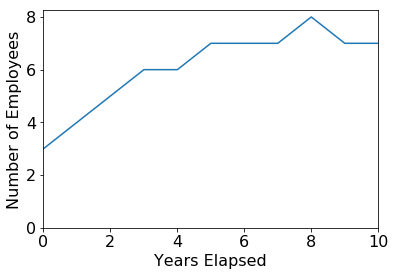

In [17]:
s = employees_each_year(history)
ax = s.plot.line(xlim=0, ylim=0)
ax.set_xlabel("Years Elapsed")
ax.set_ylabel("Number of Employees")
None

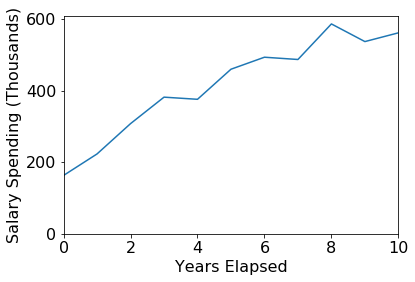

In [18]:
s = salary_each_year(history) / 1000
ax = s.plot.line(xlim=0, ylim=0)
ax.set_xlabel("Years Elapsed")
ax.set_ylabel("Salary Spending (Thousands)")
None

In [19]:
# remember the starting state, with our 3 employees
agency

{'1001': {'salary': 50000, 'position': 'engineer'},
 '1002': {'salary': 55000, 'position': 'engineer'},
 '1003': {'salary': 58000, 'position': 'engineer'}}

In [20]:
# let's explore the range of salary outcomes we may have 10 years from now,
# doing 1000 sims

salaries = []

for i in range(1000):
    history = sim_years(agency, 10)
    total = 0
    for employee in history[-1].values():
        total += employee["salary"]
    salaries.append(total)
# let's see a few outcomes:
salaries[:10]

[495708.8,
 196400.0,
 470944.0,
 352268.8,
 761383.04,
 350080.0,
 474128.0,
 383948.8,
 326000.0,
 100000]

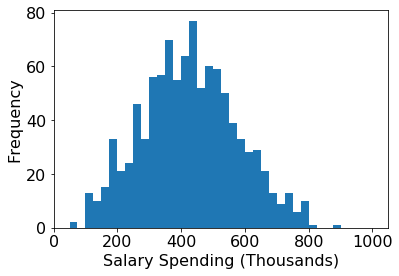

In [21]:
s = pd.Series(salaries) / 1000
ax = s.plot.hist(xlim=0, bins=range(0,1001,25))
ax.set_xlabel("Salary Spending (Thousands)")
None